In [70]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [71]:
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [72]:
print('Total number of rows are ',df.shape[0])
print('Total number of columns are ',df.shape[1])

Total number of rows are  301
Total number of columns are  9


In [73]:
print('The number of null values prsent in data set ','\n',df.isnull().sum())

The number of null values prsent in data set  
 Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [75]:
for col in df.columns:
    print('\n')
    print('coulmn name is - ', col)
    print('number of unique values present in this column is ', len(df[col].unique()))




coulmn name is -  Car_Name
number of unique values present in this column is  98


coulmn name is -  Year
number of unique values present in this column is  16


coulmn name is -  Selling_Price
number of unique values present in this column is  156


coulmn name is -  Present_Price
number of unique values present in this column is  147


coulmn name is -  Kms_Driven
number of unique values present in this column is  206


coulmn name is -  Fuel_Type
number of unique values present in this column is  3


coulmn name is -  Seller_Type
number of unique values present in this column is  2


coulmn name is -  Transmission
number of unique values present in this column is  2


coulmn name is -  Owner
number of unique values present in this column is  3


In [76]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [78]:
df = df.drop('Car_Name',axis=1)

In [79]:
df['years od old'] = 2022 - df['Year']

In [80]:
df = df.drop('Year',axis=1)

In [82]:
df


,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,years od old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,6
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,7
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,13
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,5


In [83]:
le = LabelEncoder()
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])
df['Seller_Type'] = le.fit_transform(df['Seller_Type'])
df['Transmission'] = le.fit_transform(df['Transmission'])
df['Owner'] = le.fit_transform(df['Owner'])

In [84]:
df.head(10)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,years od old
0,3.35,5.59,27000,2,0,1,0,8
1,4.75,9.54,43000,1,0,1,0,9
2,7.25,9.85,6900,2,0,1,0,5
3,2.85,4.15,5200,2,0,1,0,11
4,4.60,6.87,42450,1,0,1,0,8
5,9.25,9.83,2071,1,0,1,0,4
6,6.75,8.12,18796,2,0,1,0,7
7,6.50,8.61,33429,1,0,1,0,7
8,8.75,8.89,20273,1,0,1,0,6
9,7.45,8.92,42367,1,0,1,0,7


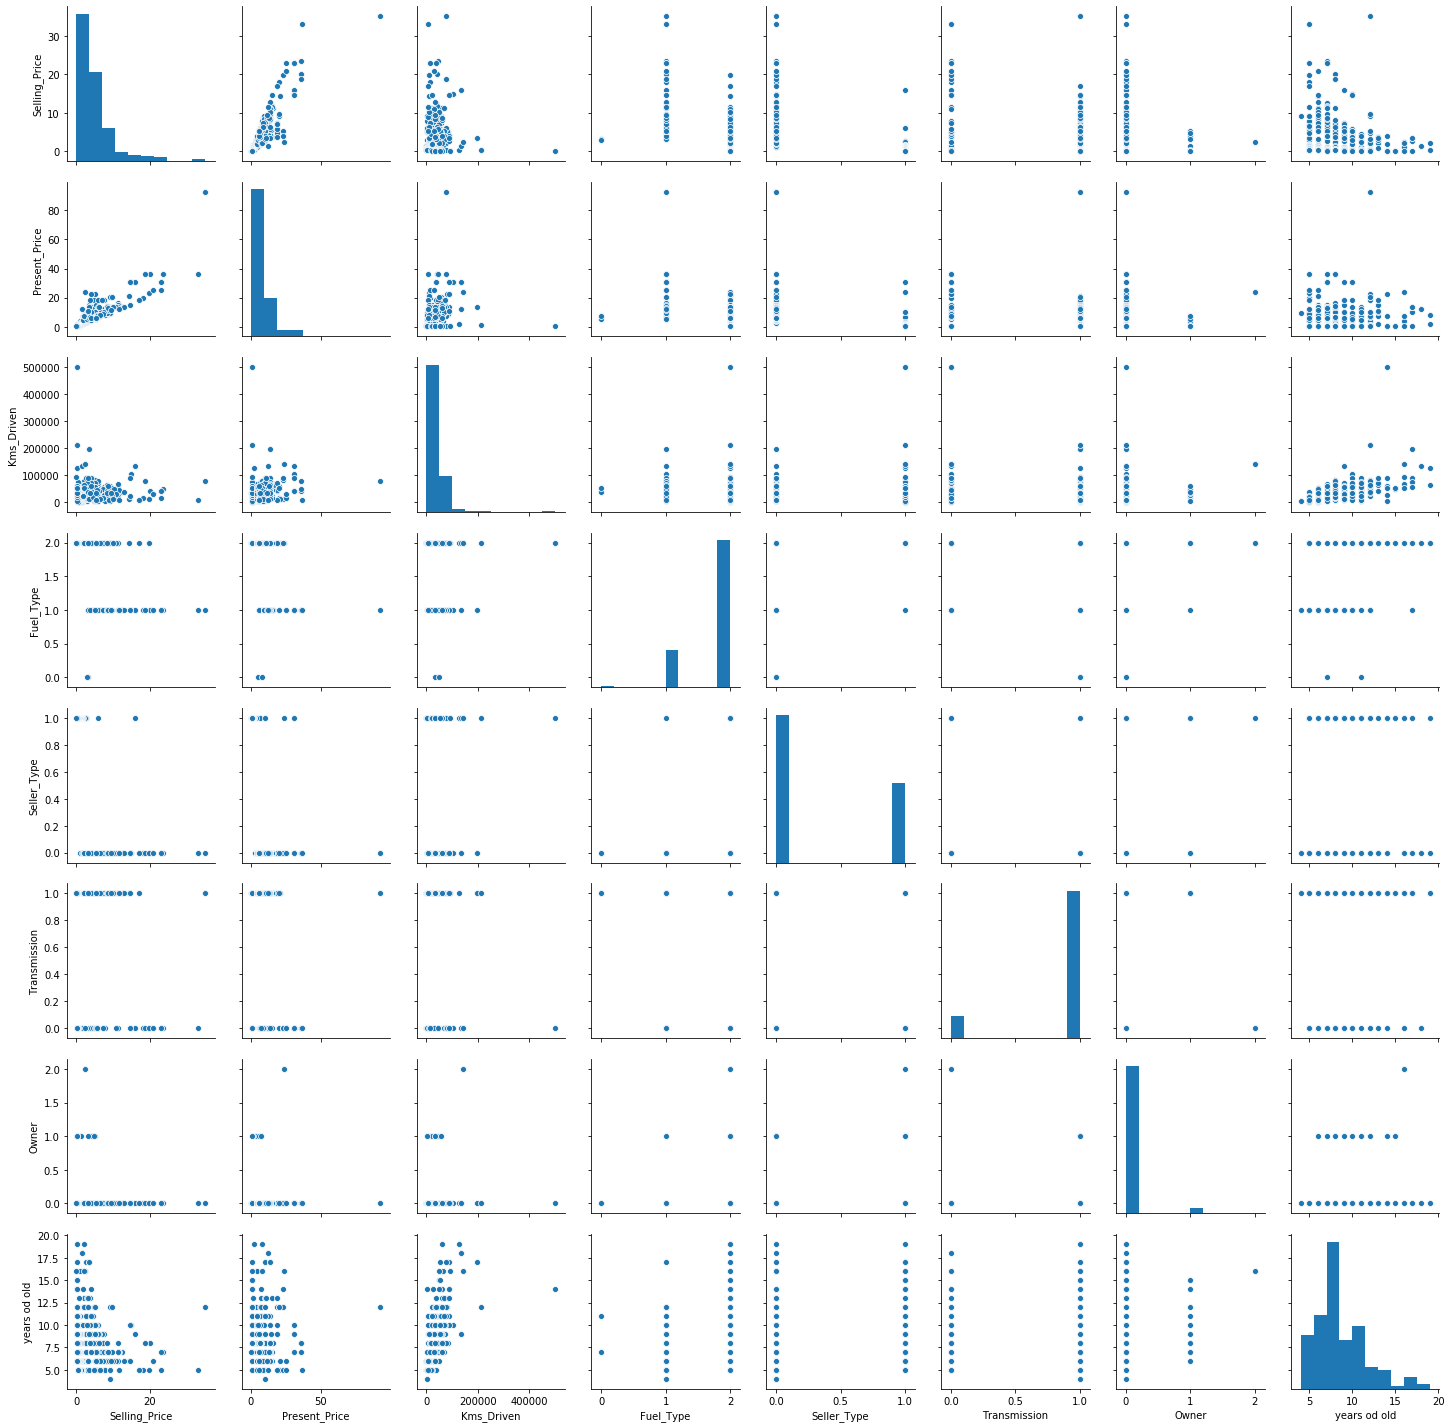

In [85]:
sns.pairplot(df)

In [86]:
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,years od old
Selling_Price,1.000000,0.878983,0.029187,-0.509467,-0.550724,-0.367128,-0.096487,-0.236141
Present_Price,0.878983,1.000000,0.203647,-0.440415,-0.512030,-0.348715,-0.019838,0.047584
Kms_Driven,0.029187,0.203647,1.000000,-0.166801,-0.101419,-0.162510,0.061766,0.524342
Fuel_Type,-0.509467,-0.440415,-0.166801,1.000000,0.352415,0.080466,0.057210,0.053643
Seller_Type,-0.550724,-0.512030,-0.101419,0.352415,1.000000,0.063240,0.123854,0.039896
Transmission,-0.367128,-0.348715,-0.162510,0.080466,0.063240,1.000000,-0.018716,-0.000394
Owner,-0.096487,-0.019838,0.061766,0.057210,0.123854,-0.018716,1.000000,0.171232
years od old,-0.236141,0.047584,0.524342,0.053643,0.039896,-0.000394,0.171232,1.000000


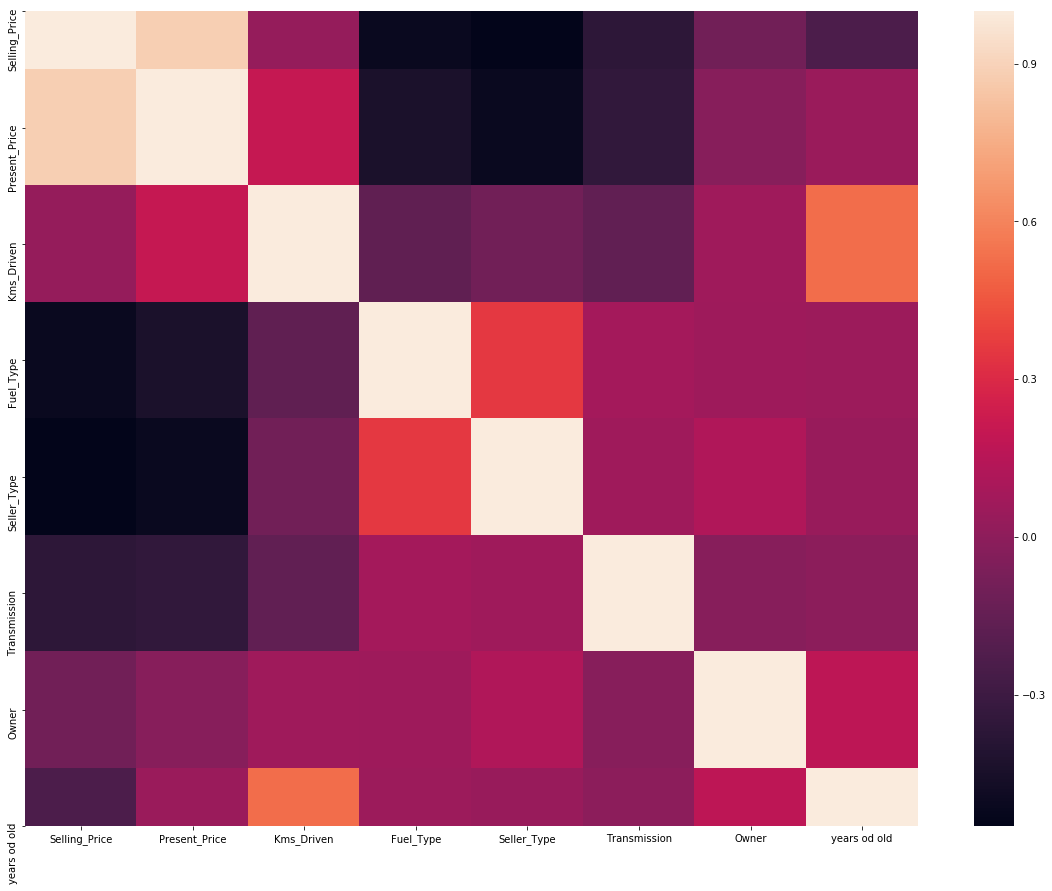

In [87]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr())

In [88]:
X=df.drop('Selling_Price',axis=1)
y=df['Selling_Price']
print(X.shape, y.shape)

(301, 7) (301,)


In [89]:
print(X.head())
print('\n',y.head())

   Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  Owner  \
0           5.59       27000          2            0             1      0   
1           9.54       43000          1            0             1      0   
2           9.85        6900          2            0             1      0   
3           4.15        5200          2            0             1      0   
4           6.87       42450          1            0             1      0   

   years od old  
0             8  
1             9  
2             5  
3            11  
4             8  

 0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64


In [90]:
model = ExtraTreesRegressor()
model = model.fit(X,y)
model.feature_importances_

array([0.40453541, 0.03878827, 0.14596303, 0.25125126, 0.08009804,
       0.00070904, 0.07865495])

<BarContainer object of 7 artists>

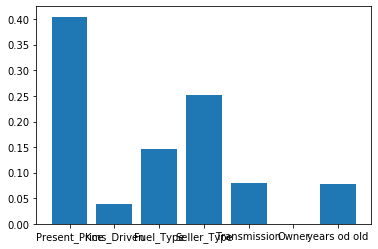

In [91]:
plt.bar(X.columns, model.feature_importances_)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=40)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(225, 7) (76, 7) (225,) (76,)


In [93]:
# Number of trees in random forest
n_estimators = [int(x) for x in range(100, 1200, 200)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [94]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# First create the base model to tune
rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [95]:
rf_random = rf_random.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   1.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   2.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   2.3s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   1.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   1.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=500; total time=   1.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=500; total time=   1.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estima

In [96]:
print('Model best parameters --> ', rf_random.best_params_ )
print('\n')
print('Model best score --> ', rf_random.best_score_)

Model best parameters -->  {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 30}


Model best score -->  -3.488085340906417


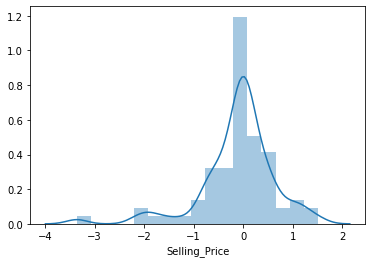

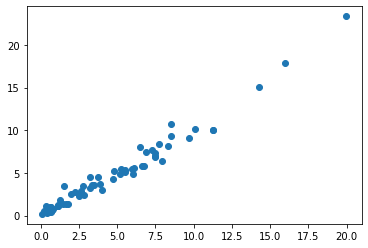

In [97]:
predictions=rf_random.predict(X_test)
sns.distplot(y_test-predictions)
plt.show()
plt.scatter(y_test,predictions)
plt.show()

In [98]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('r2_score:', metrics.r2_score(y_test, predictions))

MAE: 0.4923832955458282
MSE: 0.5858083122091313
RMSE: 0.765381154856279
r2_score: 0.9642855592705716


In [104]:
import pickle

file = open('Vehiocle Price Prediction.pkl', 'wb')

pickle.dump(rf_random,file)

In [105]:
X


,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,years od old
0,5.59,27000,2,0,1,0,8
1,9.54,43000,1,0,1,0,9
2,9.85,6900,2,0,1,0,5
3,4.15,5200,2,0,1,0,11
4,6.87,42450,1,0,1,0,8
...,...,...,...,...,...,...,...
296,11.60,33988,1,0,1,0,6
297,5.90,60000,2,0,1,0,7
298,11.00,87934,2,0,1,0,13
299,12.50,9000,1,0,1,0,5
